# SALES DATA ANALYSIS 

Import the `Libaries`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

Import the `Dataset`

In [5]:
df = pd.read_csv(r'C:\Users\MARYAMBROSE\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [6]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
#The length of the dataframe
len(df)

9994

In [8]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

## Order Date
Convert the `Order Date` column to `datetime` Object

In [12]:
from datetime import datetime

Create two new columns `Month` and `Year` to store the Month and Year values extracted from the `Order Date`

In [15]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y", errors="coerce")
df["Month"] = df["Order Date"].dt.strftime('%B')
df["Year"] = df["Order Date"].dt.year

#### `Customer Name`

In [16]:
len(df["Customer Name"].unique())

50

#### `Category`

In [17]:
df["Category"].value_counts()

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

#### `Plot` each category against the total count

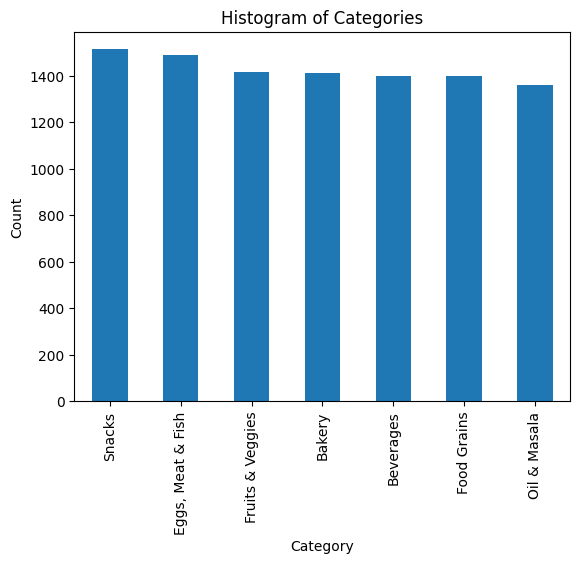

In [18]:
df["Category"].value_counts().plot(kind="bar")

plt.title("Histogram of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

Top 3 categories in total count of orders

1. Snacks
2. Eggs, Meat & Fish
3. Fruits and Veggies

####  `Sub Category`
Each Category has multiple sub categories

In [19]:
df["Sub Category"].value_counts()

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

`Plot` each Sub Category agains the total count

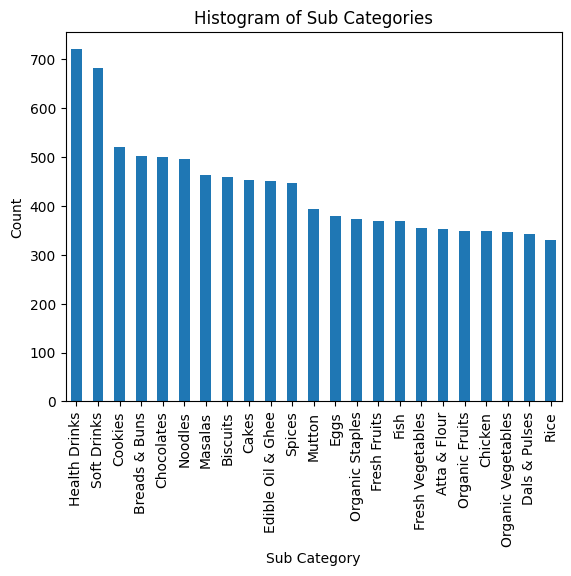

In [20]:
#Plot a histrogram of the `Sub Categorical` Column
df["Sub Category"].value_counts().plot(kind="bar")
plt.title("Histogram of Sub Categories")
plt.xlabel("Sub Category")
plt.ylabel("Count")
plt.show()

Top 3 `Sub Categories` purchased

1. Health Drinks
2. Soft Drinks
3. Cookies

### Analyse from which `City` the gorcery app has more `Customers`

In [21]:
df["City"].value_counts()

City
Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: count, dtype: int64

### `Histogram`
Plot a histogram to understand from which `City` the grocery store has more `customers`

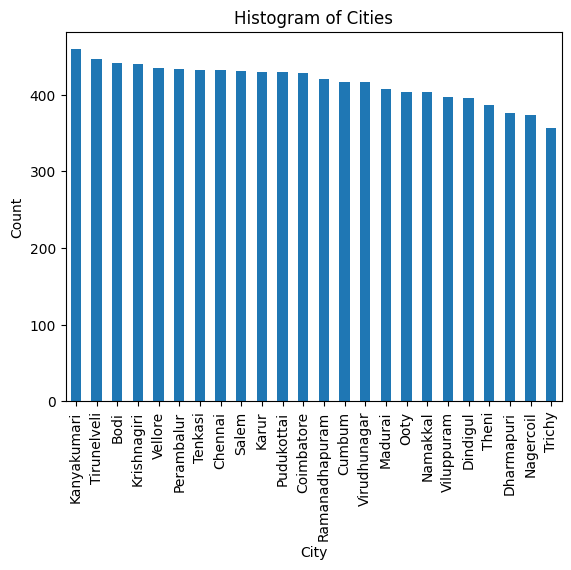

In [22]:
#Plot a histrogram of the `Sub Categorical` Column
df["City"].value_counts().plot(kind="bar")

plt.title("Histogram of Cities")
plt.xlabel("City")
plt.ylabel("Count")

plt.show()

Top 3 `Cities` from where the `Customers` purchases
1. Kanyakumari
2. Tirunelveli
3. Bodi

### `Month wise Analysis`

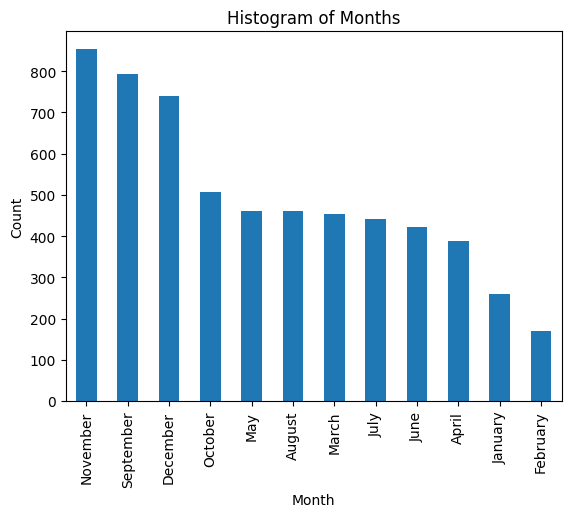

In [23]:
#Let's calculate in which Month the `Orders` are more
df["Month"].value_counts().plot(kind="bar")

plt.title("Histogram of Months")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()

Each `Category's` Order purchases performance in each month. Total we've `7 categories`, identify the growth over each month

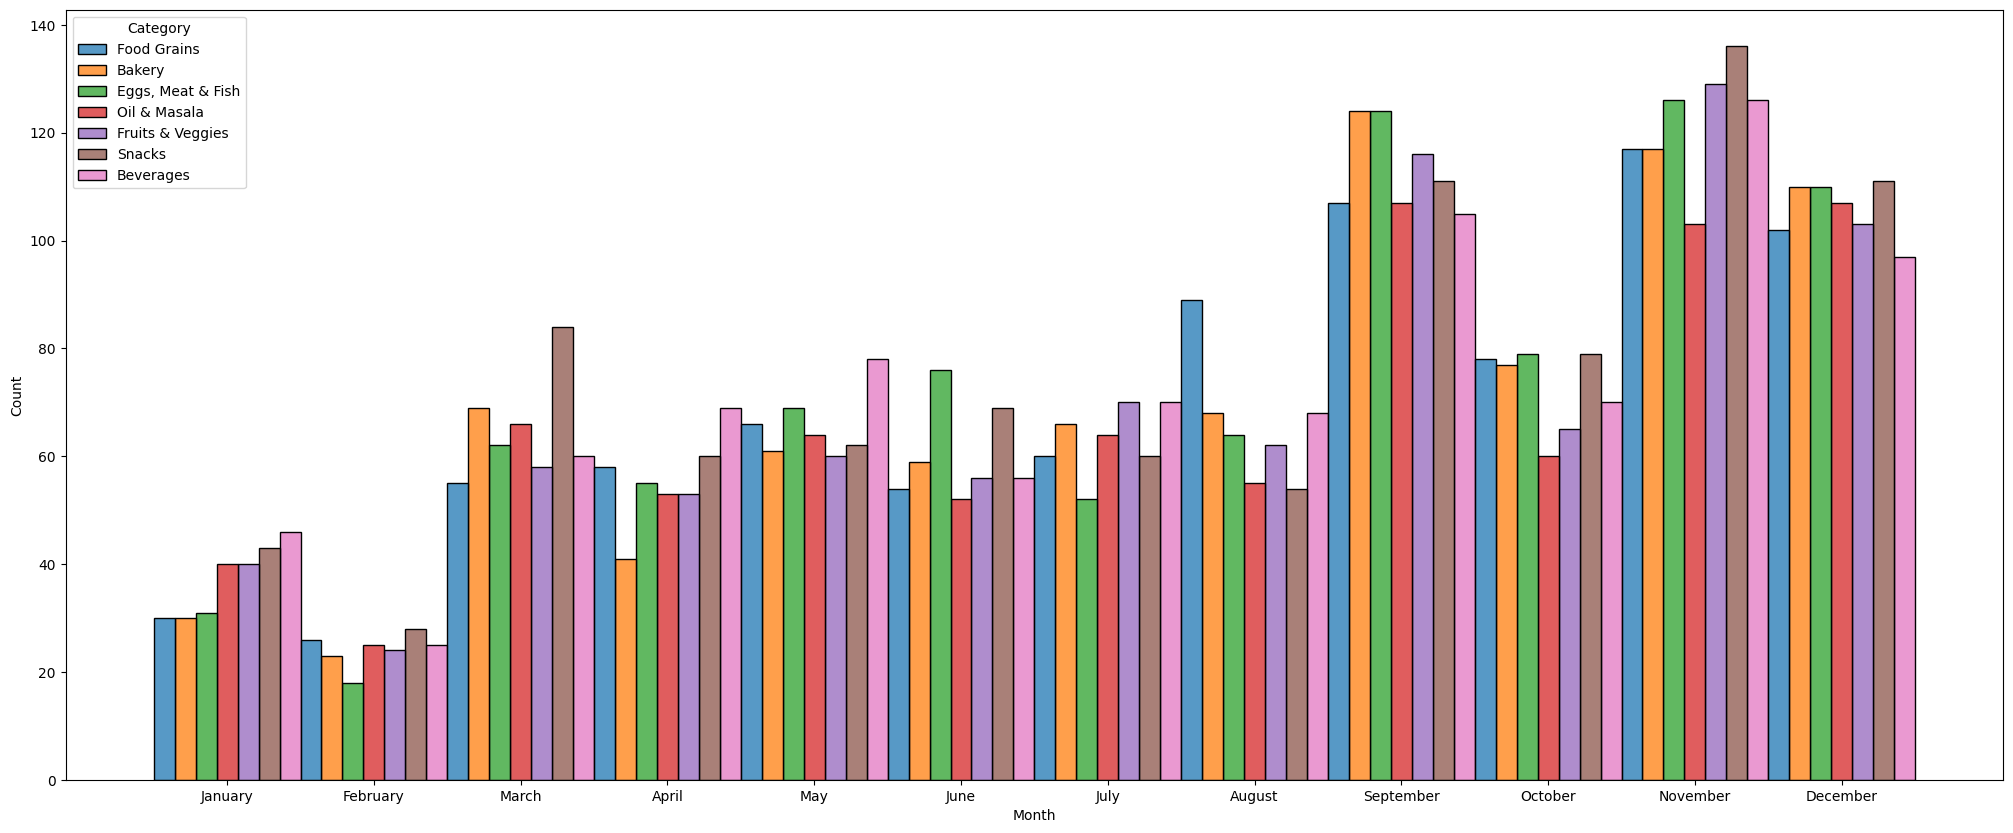

In [24]:
category_months_counts_df = df.groupby('Month')['Category'].value_counts().reset_index(name='Count')
category_months_counts_df = category_months_counts_df.sort_values(by="Month", key=lambda x: pd.to_datetime(x, format='%B'))

# Increase the size of the figure
plt.figure(figsize=(25, 10))
sns.histplot(data=category_months_counts_df, x="Month", hue="Category", weights="Count", multiple="dodge", binwidth=10)
plt.show()

### `Yearwise Analysis`

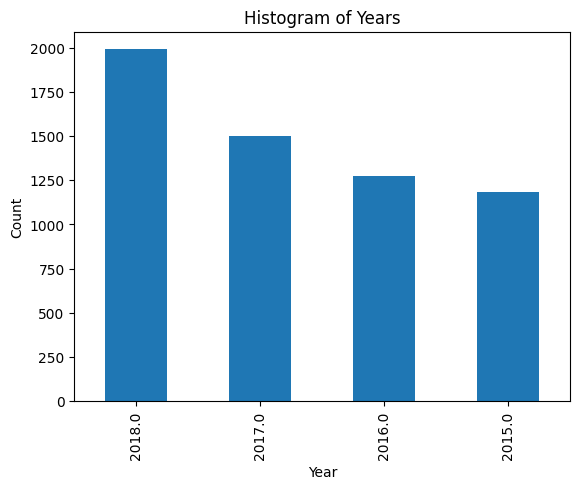

In [25]:
#In Which year the business got more orders
df["Year"].value_counts().plot(kind="bar")

plt.title("Histogram of Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

In [28]:
df_year = df[["Year"]]
df_year_orders_dict = df_year.value_counts().to_dict()
df_year_orders = pd.DataFrame(columns=["Year", "Orders Count"])
years = []
ordersCount = []

for key, value in df_year_orders_dict.items():
    years.append(int(key[0]))
    ordersCount.append(value)

df_year_orders["Year"] = years
df_year_orders["Orders Count"] = ordersCount

df_year_orders = df_year_orders.sort_values("Year", ascending=True)
df_year_orders = df_year_orders.reset_index(drop=True)
df_year_orders

,Year,Orders Count
0,2015,1186
1,2016,1276
2,2017,1500
3,2018,1990


In [29]:
df_year_orders["Year-to-Year"] = ""
df_year_orders["Percentage_Growth"] = ""

year_to_year = []
percentage_growth_year_to_year = []

for i, current_row in df_year_orders.iterrows():
    previous_row = df_year_orders.shift(1).iloc[i]
    previous_year = previous_row["Year"]
    
    if math.isnan(previous_year):
        year_to_year.append("-2015")
        percentage_growth_year_to_year.append(0)
    else:
        year_to_year.append(str(int(previous_year)) + "-" + str(int(current_row["Year"])))
        
        previous_orders_count = previous_row["Orders Count"]
        current_orders_count = current_row["Orders Count"]
        percentage_growth = ((current_orders_count-previous_orders_count) / (previous_orders_count)) * 100
        percentage_growth_year_to_year.append(percentage_growth)

df_year_orders["Year-to-Year"] = year_to_year
df_year_orders["Percentage_Growth"] = percentage_growth_year_to_year

df_year_orders

,Year,Orders Count,Year-to-Year,Percentage_Growth
0,2015,1186,-2015,0.000000
1,2016,1276,2015-2016,7.588533
2,2017,1500,2016-2017,17.554859
3,2018,1990,2017-2018,32.666667


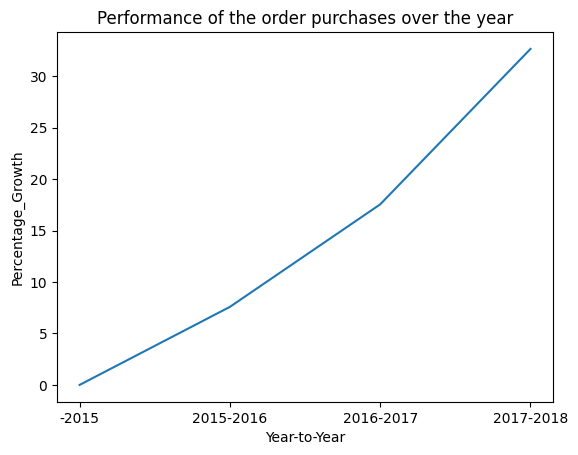

In [30]:
# Let's plot the increase in growth of the order sales
plt.plot(df_year_orders["Year-to-Year"].tolist(), df_year_orders["Percentage_Growth"].tolist())

plt.xlabel("Year-to-Year")
plt.ylabel("Percentage_Growth")
plt.title("Performance of the order purchases over the year")

plt.show()

In [31]:
df_2016_2017 = df.loc[(df['Year'] == 2016) | (df['Year'] == 2017)]

In [32]:
df_2016_2017_Category = df_2016_2017.groupby('Year')['Category'].value_counts().reset_index(name='Count')
df_2016_2017_Category = df_2016_2017_Category.pivot(index="Category", columns='Year', values='Count').reset_index()
df_2016_2017_Category.columns = ['Category', '2016', '2017']
df_2016_2017_Category

,Category,2016,2017
0,Bakery,190,197
1,Beverages,186,207
2,"Eggs, Meat & Fish",180,213
3,Food Grains,161,233
4,Fruits & Veggies,190,213
5,Oil & Masala,178,207
6,Snacks,191,230


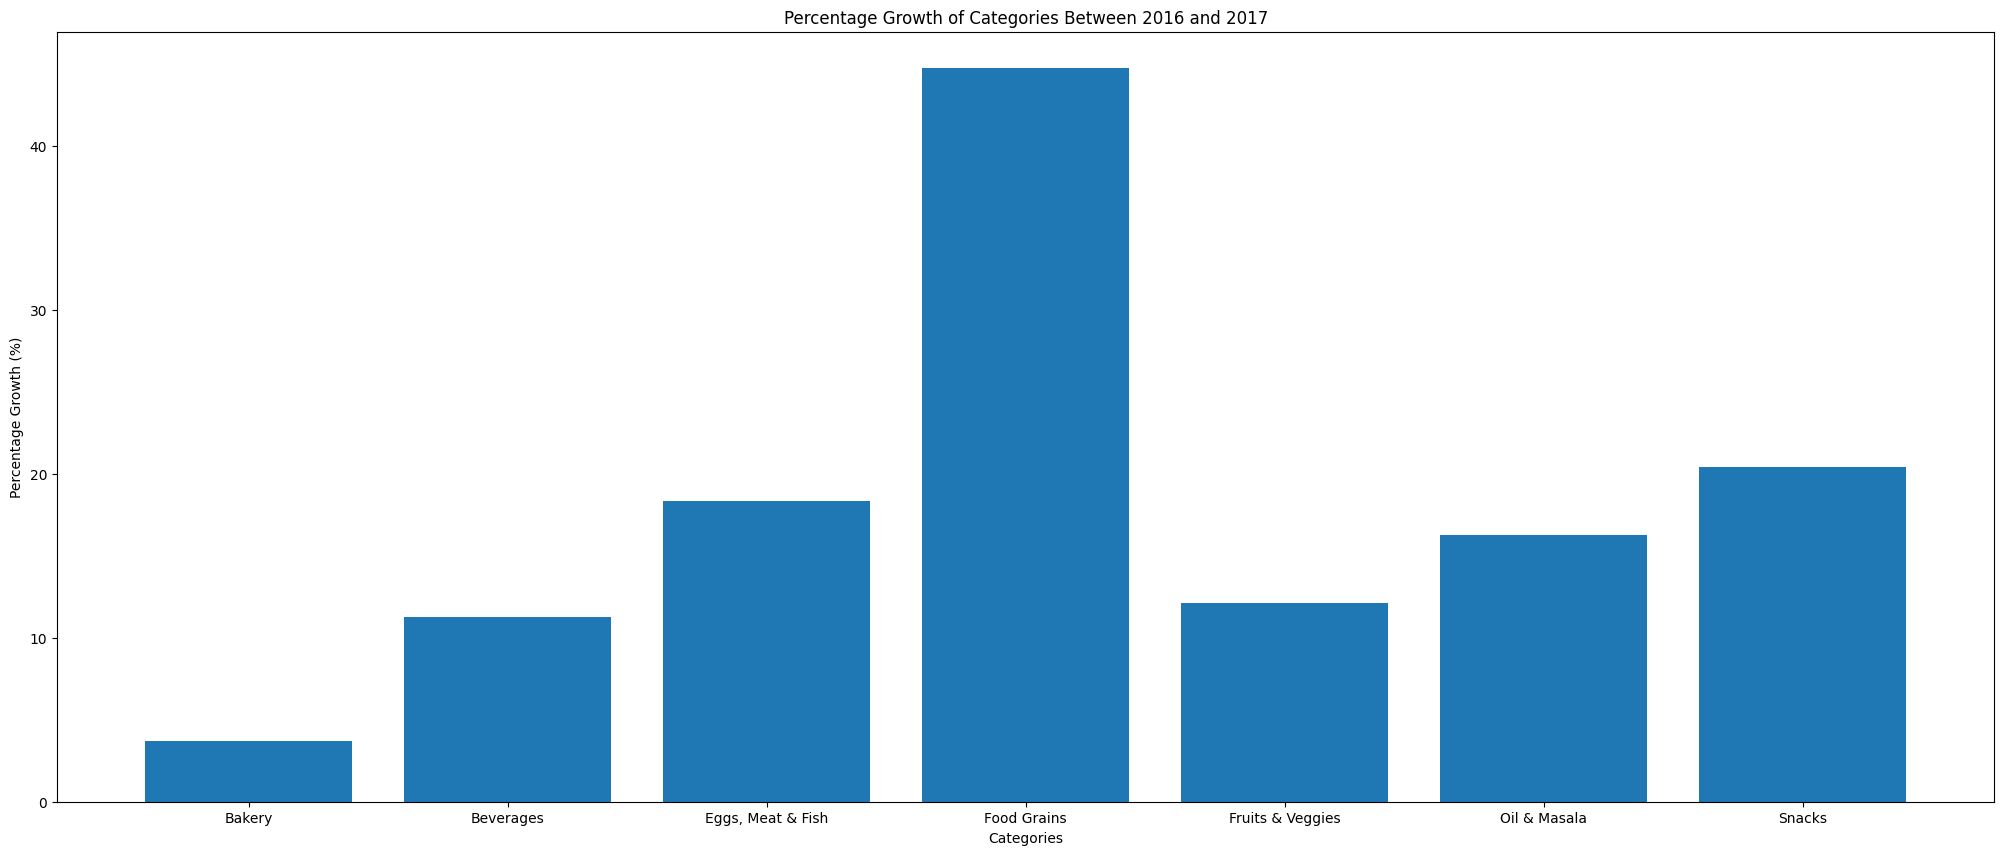

In [33]:
growth_percentage_between_2016_and_2017 = [round((y2-y1)/y1*100, 2) 
                                           for y1, y2 in zip(df_2016_2017_Category["2016"].tolist(), 
                                                             df_2016_2017_Category["2017"].tolist())]
#Create a bar chart
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(df_2016_2017_Category["Category"].tolist(), growth_percentage_between_2016_and_2017)

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage Growth (%)')
ax.set_title('Percentage Growth of Categories Between 2016 and 2017')

# Show the plot
plt.show()

### Calculate the Percentage of order growth among the cities

In [34]:
df_2016_2017_Cities = df_2016_2017.groupby('Year')['City'].value_counts().reset_index(name='Count')
df_2016_2017_Cities = df_2016_2017_Cities.pivot(index="City", columns='Year', values='Count').reset_index()
df_2016_2017_Cities.columns = ['City', '2016', '2017']

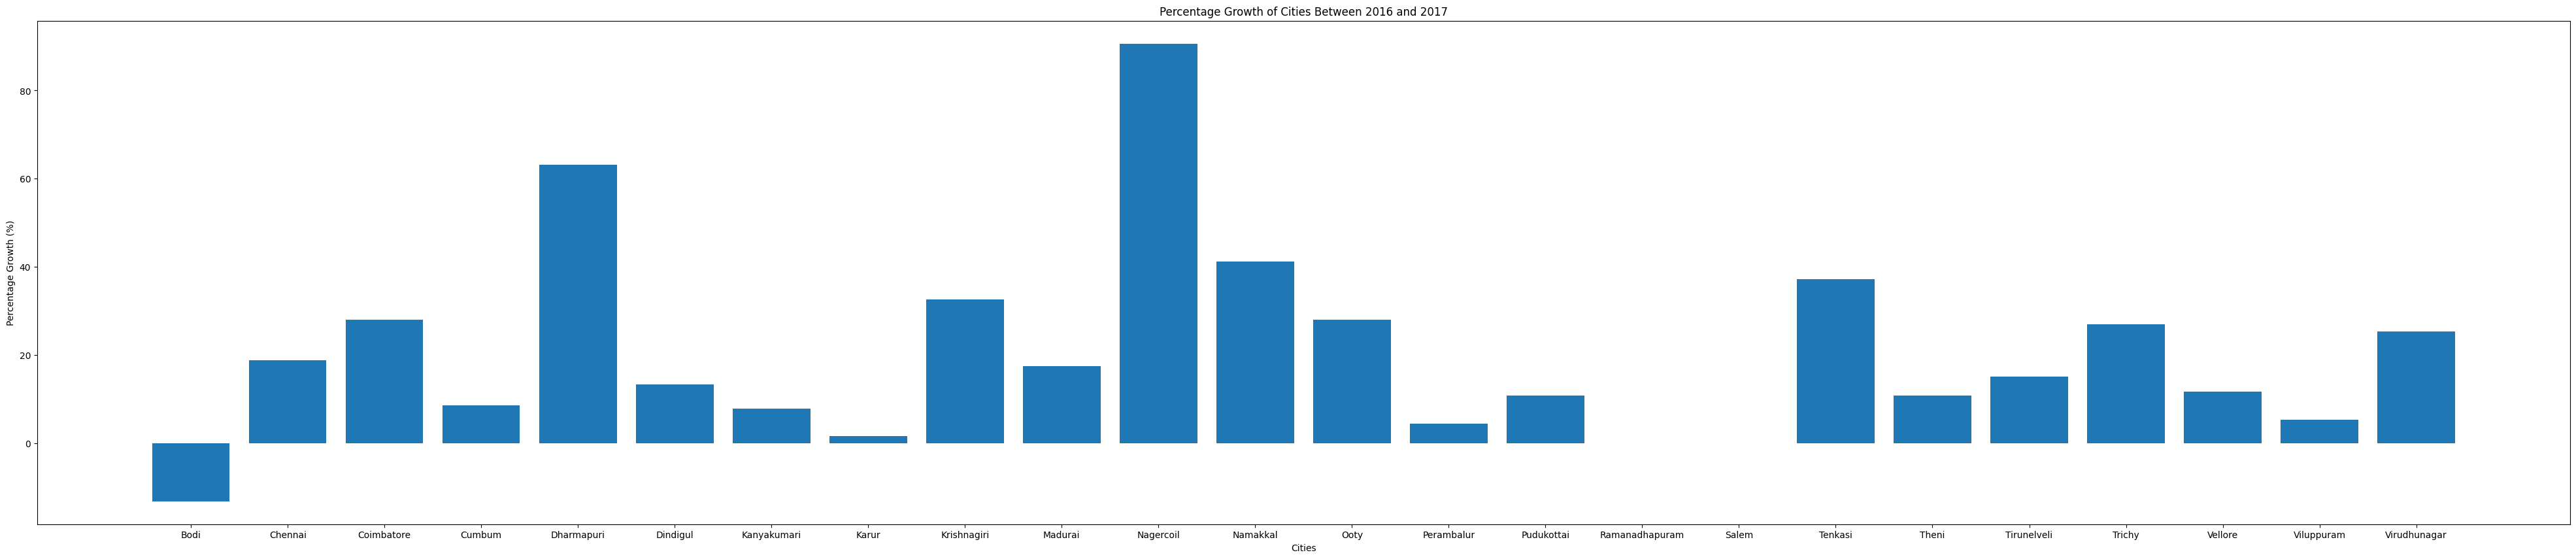

In [35]:
growth_percentage_between_2016_and_2017 = [round((y2-y1)/y1*100, 2) 
                                           for y1, y2 in zip(df_2016_2017_Cities["2016"].tolist(), 
                                                             df_2016_2017_Cities["2017"].tolist())]
#Create a bar chart
fig, ax = plt.subplots(figsize=(50,10))
ax.bar(df_2016_2017_Cities["City"].tolist(), growth_percentage_between_2016_and_2017)

# Add labels and title
ax.set_xlabel('Cities')
ax.set_ylabel('Percentage Growth (%)')
ax.set_title('Percentage Growth of Cities Between 2016 and 2017')

# Show the plot
plt.show()